# **Week 3: Path planning and obstacle avoidance**

# **4. Path planning theory**


* Robots often have to move from a starting point A to a destination B.

*  In order to get from A to B, it needs to choose a certain path. 


* But how do we choose this path?

* This decision can depend on a lot of constraints such as time, cost, or road conditions



# **4.1 Topological	representation**

In order to plan a path, a representation of some map is needed. 

* In the topological representation, every circle represents a point or station. 

* **We start at the green station and we want to get to the red one.**






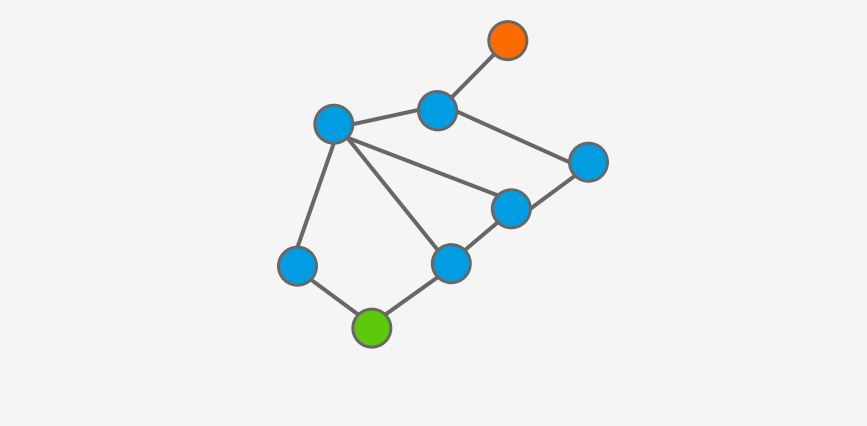

Let's label them.

* **So which way should I take?**

* Well that depends.

* **Let's say I want the shortest distance.**



* The lines connecting the circles contain information about the distance between the stations, and thus the cost. 

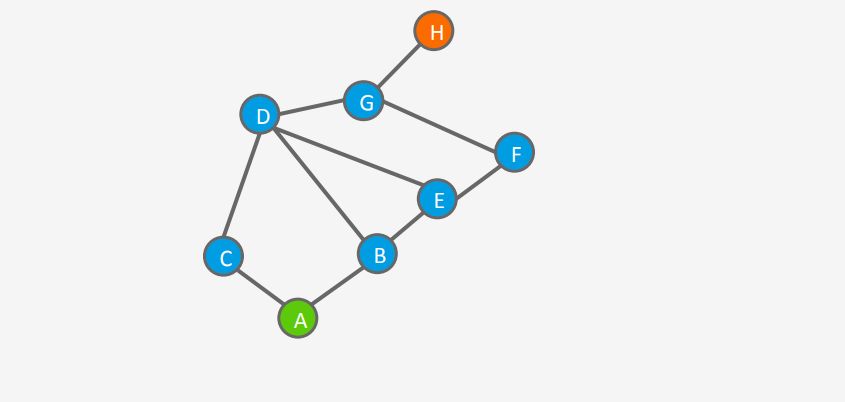


If we want to evaluate the **cost of a certain path**, we can **simply add up** the **distance values** of every connection.

*  Then, the path with the lowest cost will also have the shortest distance. 


* In our example, this is **path A-C-D-G-H.**

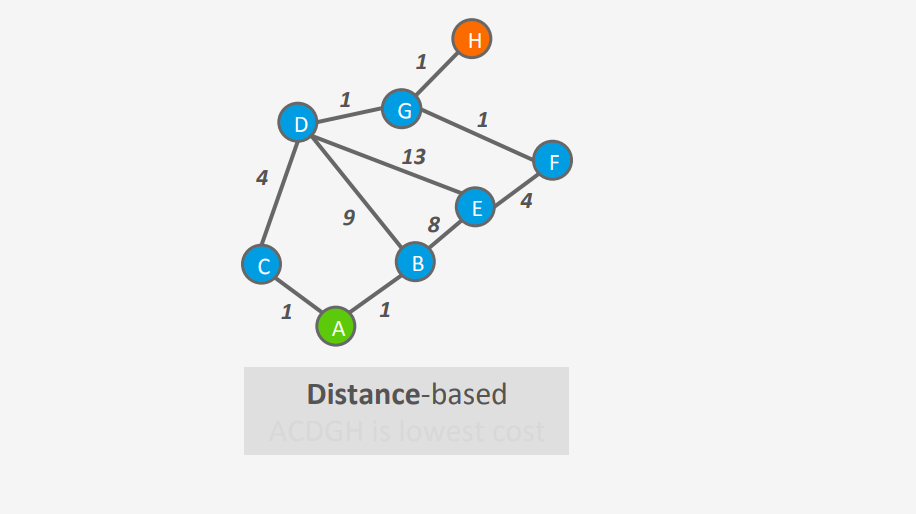

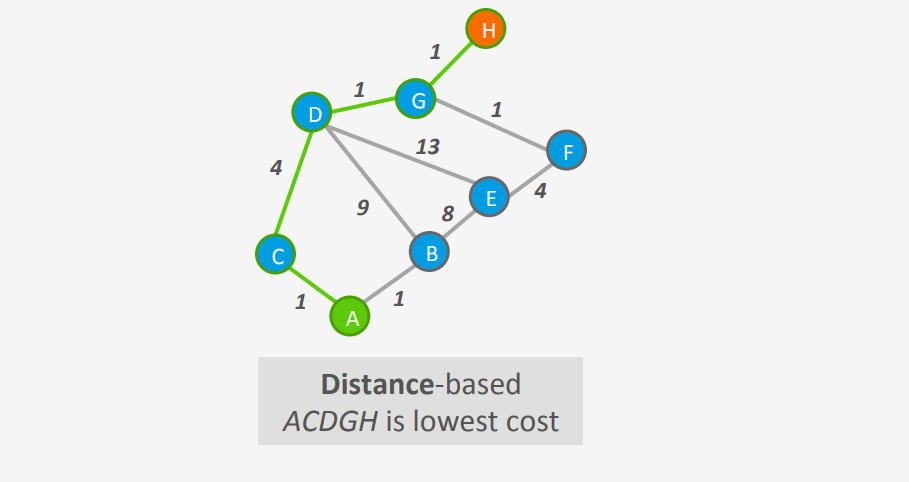

* **What will happen if I don't want the shortest distance but the shortest time.**

If we want to instead optimize for the time the route takes, we would need to find different costs for each connection. 

* **Remember shorter is not necessarily faster!** For example, we might lose a lot of time stopping at each station. 

* In this case, **path A-B-D-G-H is the best choice.**

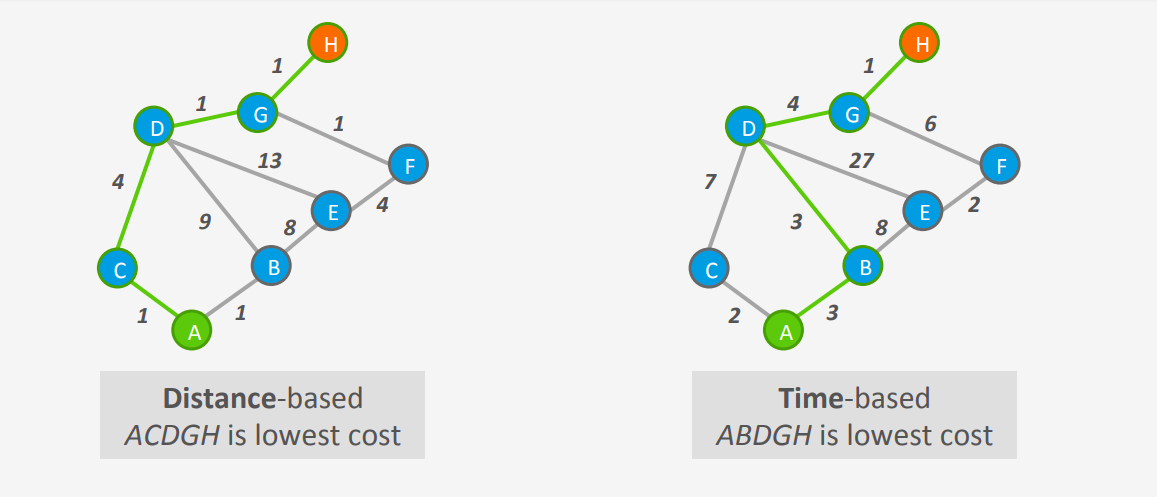

* Using these **cost functions**, we can **optimize the best path** to take. 

* Remember, we are always **optimizing with respect to some parameter** like distance, time, or even combinations.

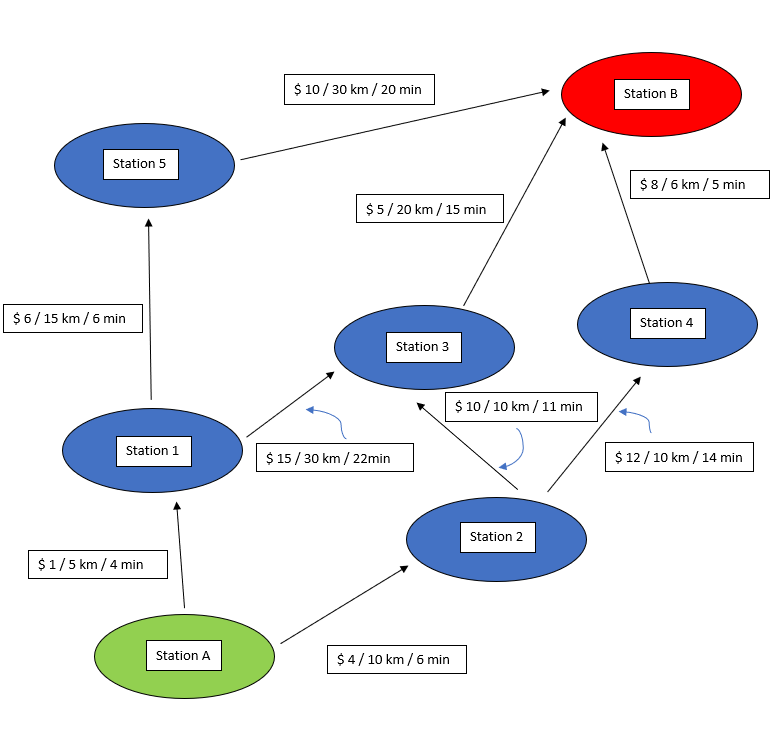

# **4.2 ROS navigation stack**

* A 2D navigation stack that takes in information from :
 * odometry,
 * sensor streams, and 
 * a goal pose and 
 * outputs safe velocity commands that are sent to a mobile base.



*  Now we wil see how autonomous navigation is implemented in ROS. 

 1. **2D	navigation**

 2. **Inputs:**
    * Odometry	
    * Sensor	data	
    * Goal	pose

 3. **Output:**
    * Safe	velocity	commands

* The ROS Navigation Stack is meant for 
 * 2D maps,
 * square or 
 * circular robots with a holonomic drive, and
 *  a planar laser scanner, all of which a Turtlebot has.
 


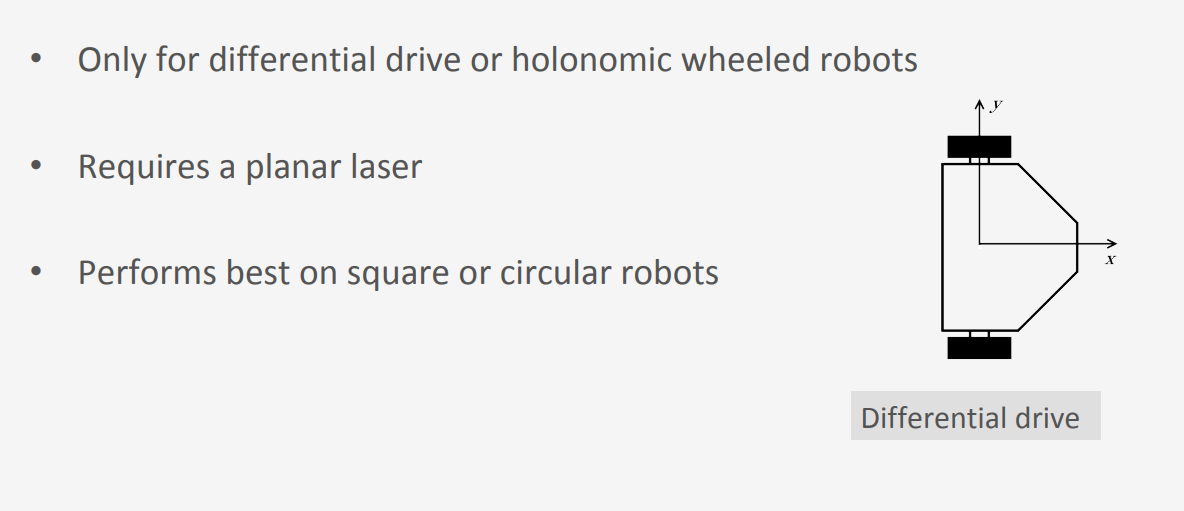

## **1. move_base**

* Provides	an	**implementation	of	an	action**
  * Actions	are	used	for	long	term	tasks	

* Uses	a	**global	and	local	planner**	to	accomplish	its	**global	navigation goal**	

* **Manages	communication**	between	the	components	of	the	 **navigation	stack**	

## **2. Navigation stack**


**Step 1 :** Sensor information is gathered (**sensor** sources node), then

**Step 2 :**  put into perspective (sensor **transformations** node), then

**Step 3 :** combined with an estimate of the robots position based off of its starting position (**odometry** source node).

**Step 4 :**  This information is published so that **`“move_base”`** can calculate the trajectory and pass on velocity commands (through the base controller node).

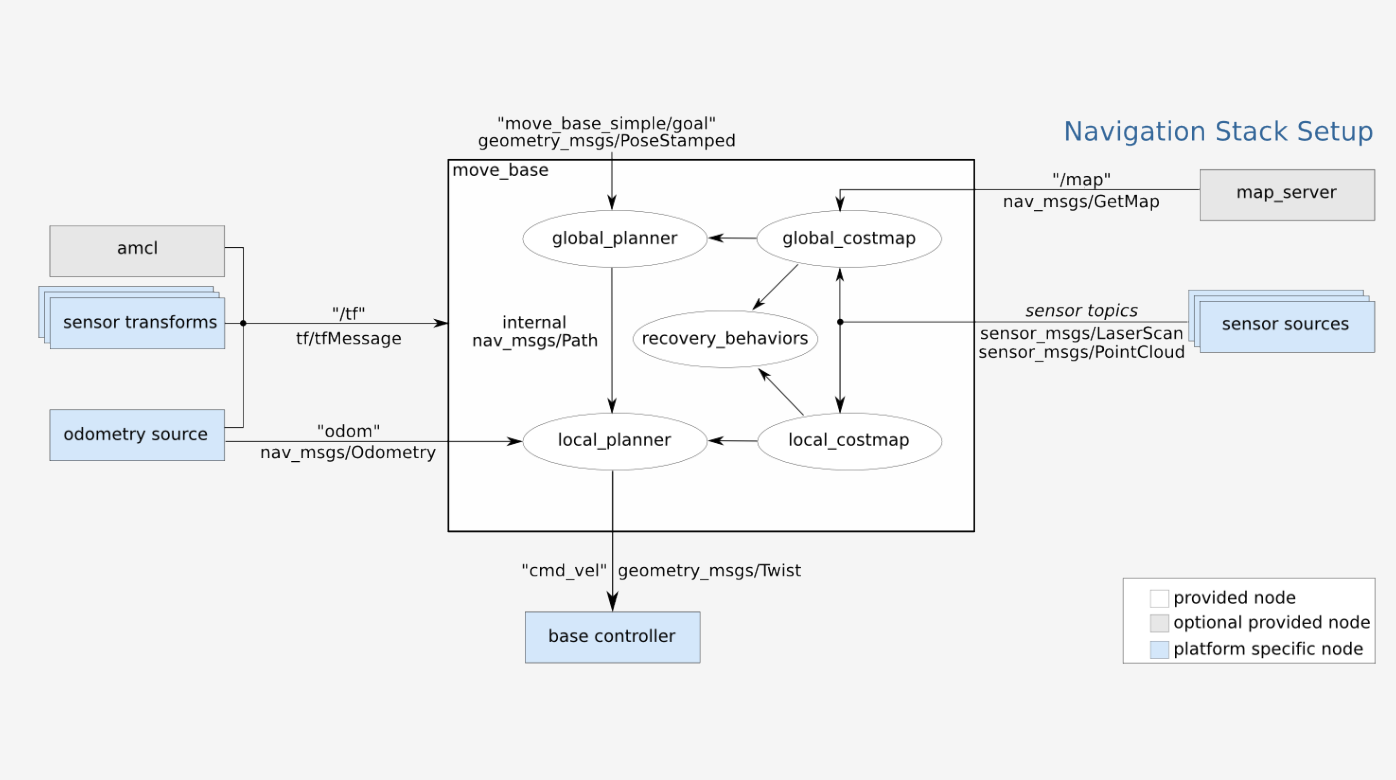

* **Sensor Sourcess**
 * sensor_msgs 

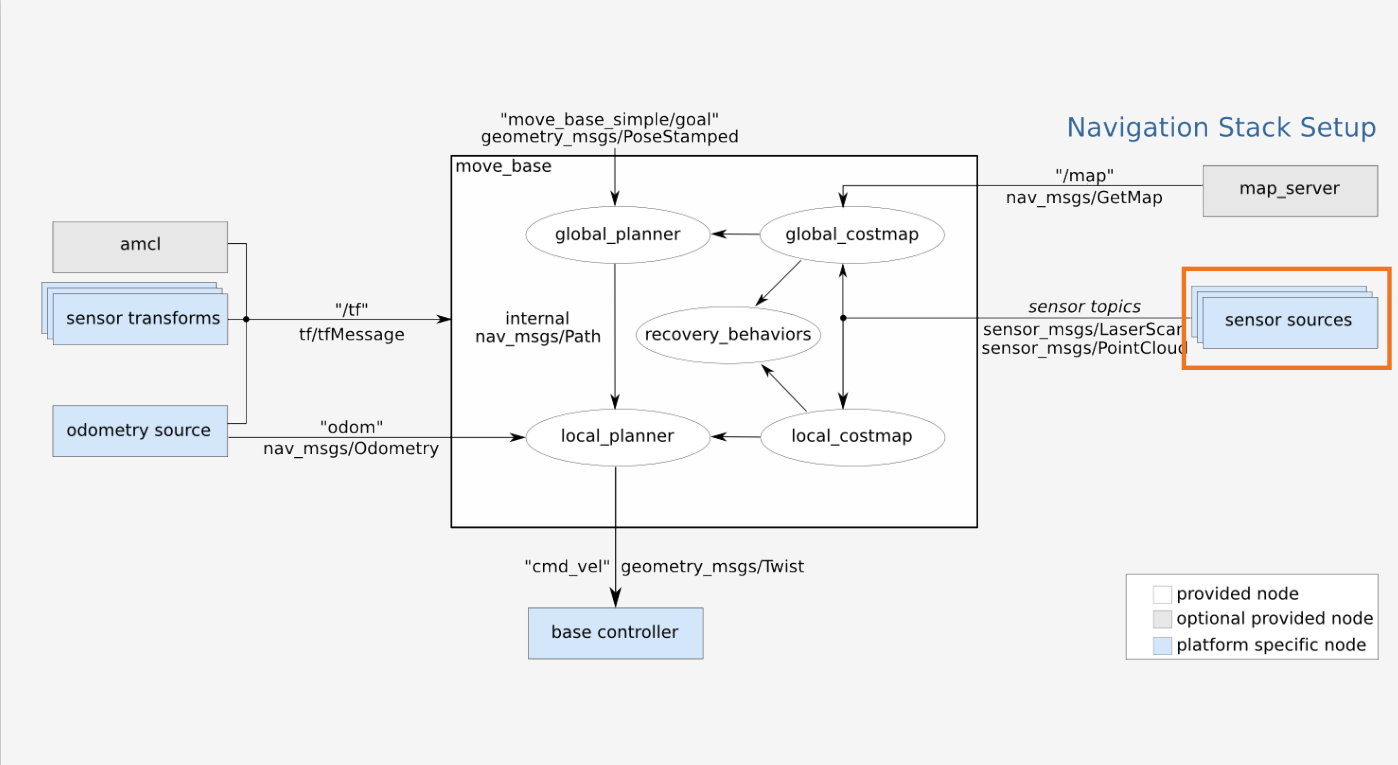

* **Sensor Transforms**
 * tf  

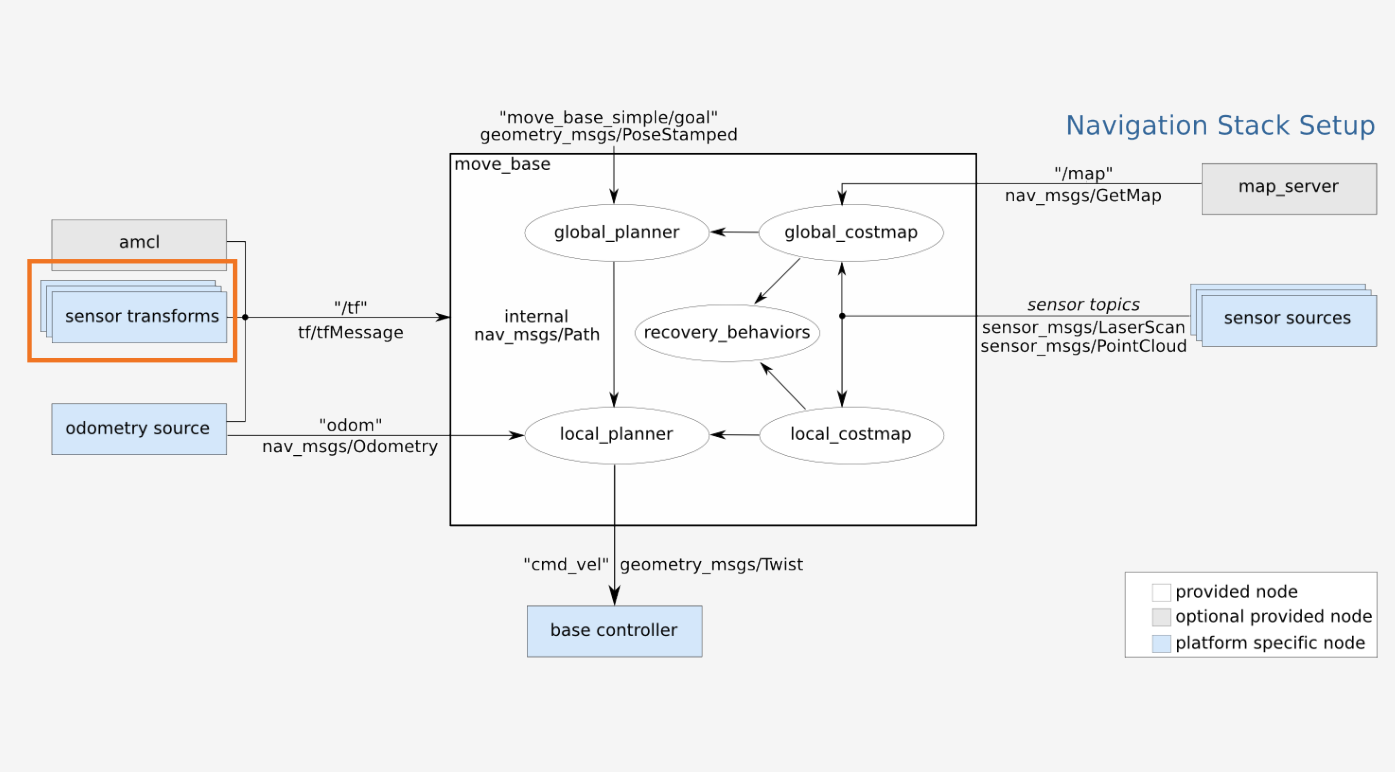

* **Odometry Source**
 * odom

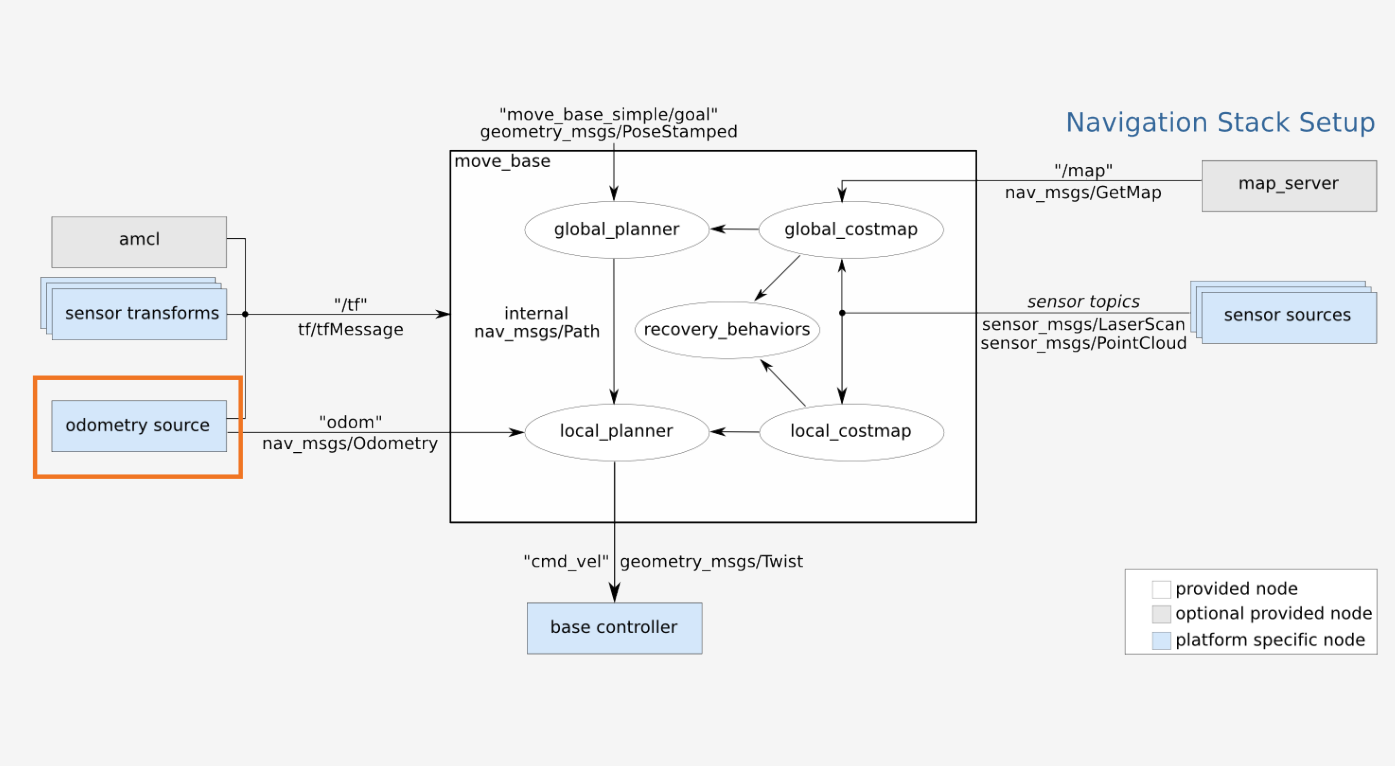

* **Base Controller**
 * cmd_vel 
 

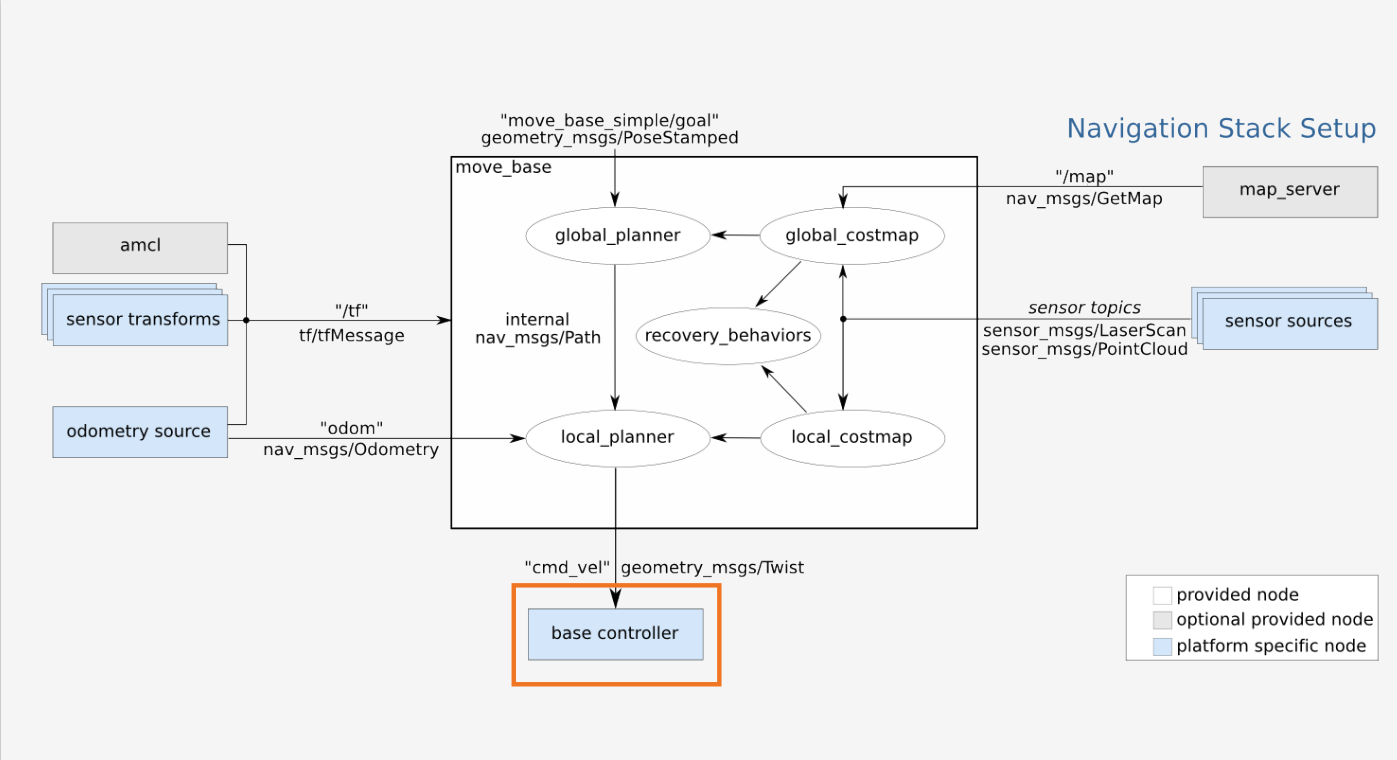

# **4.3 Path planning tutorial**


* We have seen how to create a map and localize the robot properly in the environment.

*  In this section we will take it a step further, and make the robot navigates to a goal position autonomously. 

### **`Step 1:`** Open the TurtleBot in Gazebo

In [ ]:
$ roslaunch turtlebot_gazebo turtlebot_world.launch

### **`Step 2:`** Nodes responsible for localization and navigation

* The **`amcl`** stands for **Adaptive Monte Carlo Localization**. 

* This is a probabilistic localization system for a robot moving in 2D which uses  : 
 * a particle filter to track the pose of a robot against a known map (the default one is none is specified). 

* This launcher also starts the **`move_base`** node
 *  which is responsible for planning and controlling the movements of the robot. 

In [ ]:
$ roslaunch turtlebot_gazebo amcl_demo.launch

### **`Step 3:`** RViz to visualize the navigation

In [ ]:
$ roslaunch turtlebot_rviz_launchers view_navigation.launch

* Use the **`2D post estimate` button** on the top of your **`RViz`** screen if you want to  
 * change the **`initial localization`** of the **`robot`** on the **`map`**.

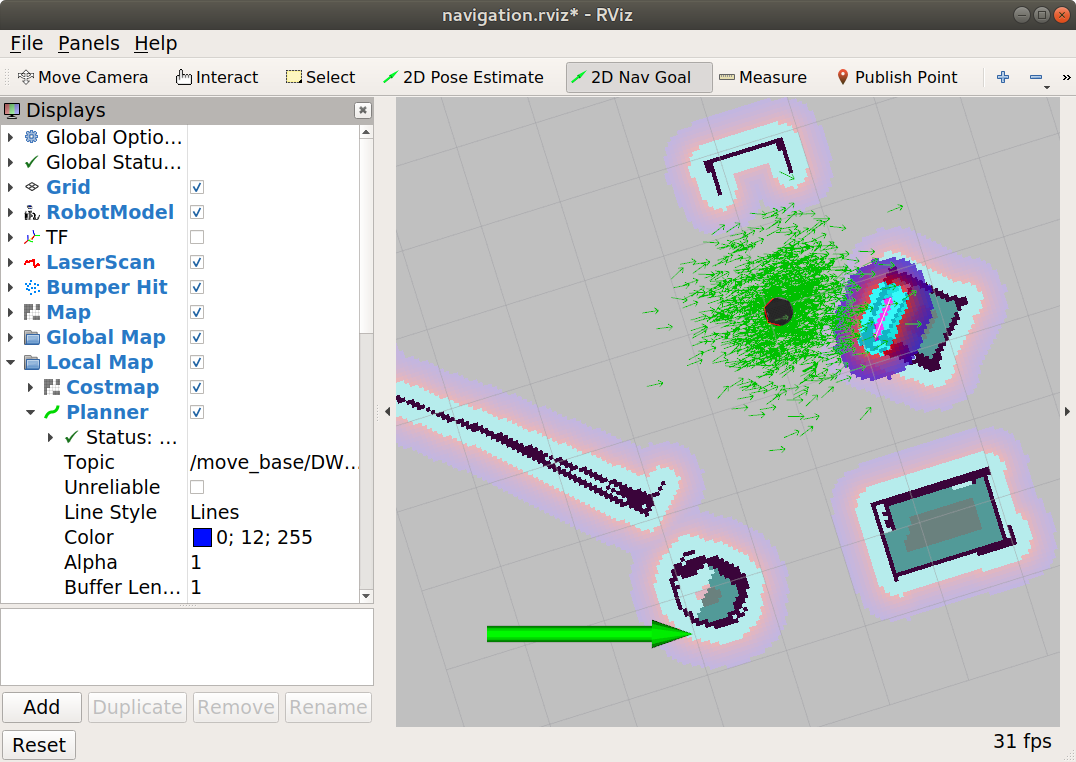

* Now, to test the unknown obstacle avoidance functionality. 

* Give the robot a target position far away. When you see the generated map, add an extra obstacle in Gazebo. 

* This can be easily done using the top menu. 

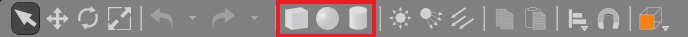

* Watch how the **TurtleBot** maneuvers around the obstacle then gets back to the original path. 

* This is done using the **local planner.** 



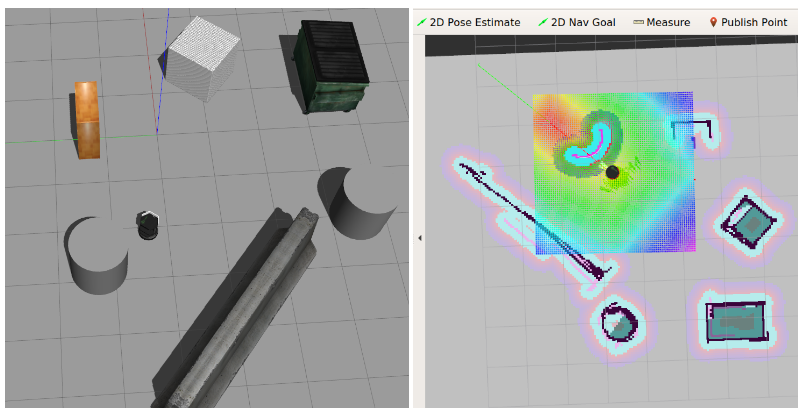

## **`Question 1:`**

* The **ROS navigation stack** does not require a map to achieve autonomous navigation? 

* Ans: **True** 